# The Heuristic Policy
The ```HeuristicPolicy``` suggests all moves that are somewhat 'reasonable'. Not too far a way from existing stones and ideally on rows or soon-to-be rows with other stones.
Criticality is respected, so that MUST-moves are easily spotted.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import aegomoku.tools as gt
from aegomoku.utils import analyse_board
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.gomoku_board import GomokuBoard

In [4]:
BOARD_SIZE = 15

In [5]:
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"

2022-08-05 17:35:42.184597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


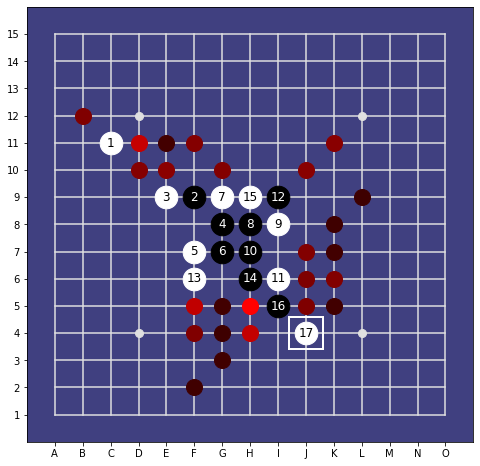

In [6]:
policy = HeuristicPolicy(BOARD_SIZE)
analyse_board(15, stones, policy)

---
# The policy components


## Primary Detector Layer

The primary detector takes the stones and boundary as input and outputs 5 channels. The first three are just projections of the input, the 4th channel identifies critical positions of the current player, and the fifth channel those of the other player.

In [7]:
board = GomokuBoard(BOARD_SIZE, stones)
Move = board.Stone

In [8]:
from aegomoku.policies.primary_detector import PrimaryDetector

detector = PrimaryDetector(BOARD_SIZE)

In [9]:
output = np.squeeze(detector(board.math_rep))
output.shape

(17, 17, 5)

### The projected board

In [10]:
gt.print_channels(output)

shape: (17, 17, 5)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 1. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Threat critical open positions of current and other player

In [11]:
print(output[:, :, 3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
print(output[:, :, 4])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Forward-Looking Layers
Forward-looking layers treat threat positions as potential stones

In [13]:
from aegomoku.policies.forward_looking import ForwardLookingLayer

fwll = ForwardLookingLayer(BOARD_SIZE)

In [14]:
output = detector(board.math_rep)
fwd = np.squeeze(fwll(fwll(output)))

In [15]:
print((fwd[:, :, 3]*100.).astype(int))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 206   0   0   0   0   0   0 206   0   0   0   0   0]
 [  0   0   0   0   0 206   0   0  92   0 206   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  92   0  92   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  92   0 288   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 288   0  92   0   0   0   0]
 [  0   0   0   0   0   0 288 288 488   0 288 288  92   0   0   0   0]
 [  0   0   0   0   0   0  92   0 488   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92   0 288   0   0   0   0   0   0   0   0   0]
 [  0 

In [16]:
print((fwd[:, :, 4]*100.).astype(int))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 292   0   0  91   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  91   0 284 284 384   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 292  91   0 292   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 284   0   0   0   0]
 [  0   0   0   0   0  91   0   0   0   0   0 284   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 384   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  91   0   0 284 292   0   0   0   0   0]
 [  0   0   0   0   0   0 292   0 284   0 284   0   0   0   0   0   0]
 [  0   0   0   0   0   0 292 284  91  91   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  91   0   0   0  91   0   0   0   0   0   0]
 [  0 

---

# The combined heuristic policy-value function

### TODO: Take this policy into the Arena.ipynb to continue MCTS research!

In [17]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy

# cut_off is used to restrict advice to those positions close enough to the maximum
policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)

In [18]:
pi = lambda s: policy(s)[0]
v =  lambda s: policy(s)[1]
board.print_pi(pi)
print()
print(v(board.math_rep))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   3   4   3   1   0   0   0   0   0   0   0   0]
 [  0 494   4  10  11   8   6   2   0   2   1   2   0   0   0]
 [  0   4   0 771 256 508   9   5   1   3 527   2   1   0   0]
 [  0   7  13 513 537  16 504   5   1 529   5   5   0   0   0]
 [  0   5  15  19   0   0   0   0   0   3   8 239   1   0   0]
 [  0   5  12  20  18  11   0   0   0   8 240   3   0   0   0]
 [  0   3  10  17  21   0   0   0   7 501 251   1   0   0   0]
 [  0   2   6  15  18   0   3   0   0 484 499   0   1   0   0]
 [  0   0   4   8  10 745 251 999   0 488 250   5   0   0   0]
 [  0   0   1   2   5 493 237 760   2   0   6   1   1   0   0]
 [  0   0   0   0   0   0 246   0   0   4   1   1   0   0   0]
 [  0   0   0   0   0 246   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

tf.Tensor(-0.00461175033262567, shape=(), dtype=float

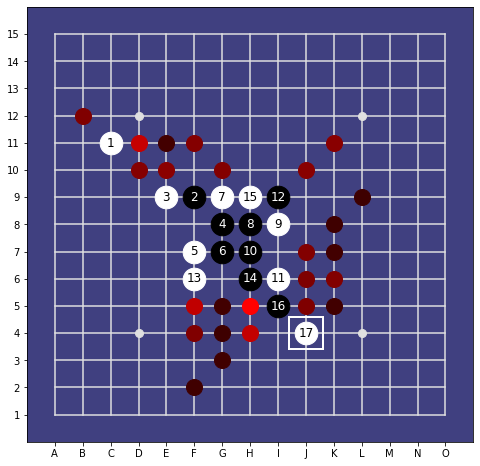

In [19]:
analyse_board(15, stones, policy)

Observe that all critical positions are also *advisable*.

In [20]:
print([Move(a) for a in policy.get_advisable_actions(board.math_rep)])

[B12, D11, E11, F11, K11, D10, E10, G10, J10, L9, K8, J7, K7, J6, K6, F5, G5, H5, J5, K5, F4, G4, H4, G3, F2]


## Super-critical positions

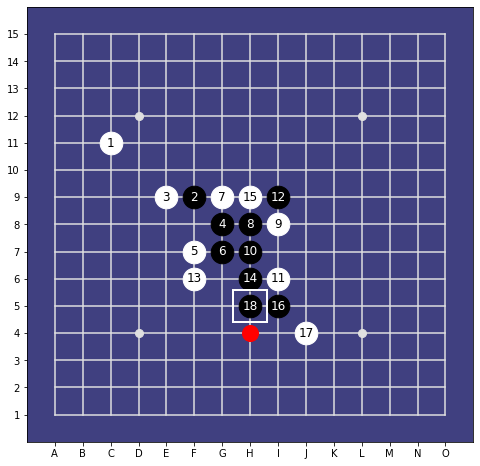

In [21]:
analyse_board(15, stones+"H5", policy)